# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [77]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [78]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

602

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [116]:
#Get the base url to pull the api request 
base_url = "http://api.openweathermap.org/data/2.5/weather?"

#List to hold weather info
city_data = []
units = "imperial"
count = 1

# loop throught all the cities and append to city list
for city in cities:
    
    #Create search query, make request and store in json
    response = requests.get(base_url + "appid=" + weather_api_key + "&q=" + city +"&units=" + units).json()
    
    # Add a one second interval between queries to stay within API query limits
    time.sleep(1)
    
    try:
        print(f"Processing Record {count}  | {response['name']}.")
        
        name = response['name']
        lat = response['coord']['lat']
        lng = response['coord']['lon']
        max_temp = response['main']['temp_max']
        Humidity = response['main']['humidity']
        cloud = response['clouds']['all']
        wind_speed = response['wind']['speed']
        country = response['sys']['country']
        date = response['dt']
        city_data.append({"City": name,"Lat": lat, "Lng" : lng, "Max Temp(F)" :max_temp,"Humidity": Humidity ,"Cloudiness": cloud, "Wind Speed" : wind_speed,"Country" : country, "Date" :date })

    except (KeyError, IndexError):
        print("City not found. Skipping...")
    count = count + 1
        

Processing Record 1  | Maumere.
Processing Record 2  | Tamandaré.
Processing Record 3  | Gaziantep.
Processing Record 4  | Ciudad Bolivar.
Processing Record 5  | Hermanus.
Processing Record 6  | Batagay.
Processing Record 7  | Saint Paul Harbor.
City not found. Skipping...
Processing Record 9  | Busselton.
Processing Record 10  | Rikitea.
Processing Record 11  | Octeville.
Processing Record 12  | Buraidah.
Processing Record 13  | Vaini.
Processing Record 14  | Avarua.
Processing Record 15  | Oktyabr'skiy.
Processing Record 16  | El Porvenir.
Processing Record 17  | Kutum.
Processing Record 18  | Norman Wells.
Processing Record 19  | Punta Arenas.
Processing Record 20  | Hobart.
Processing Record 21  | Hay River.
Processing Record 22  | Ostrovnoy.
Processing Record 23  | Esperance.
Processing Record 24  | Woodward.
Processing Record 25  | Carutapera.
Processing Record 26  | Sol'-Iletsk.
Processing Record 27  | Talcahuano.
Processing Record 28  | Chui.
Processing Record 29  | Carnarvon.


City not found. Skipping...
Processing Record 241  | La Ronge.
Processing Record 242  | Thompson.
Processing Record 243  | Pedernales.
Processing Record 244  | Poltavka.
Processing Record 245  | Acajutla.
Processing Record 246  | Barra de Tecoanapa.
Processing Record 247  | Seydi.
Processing Record 248  | Ixtapa.
Processing Record 249  | Dunedin.
Processing Record 250  | Bátya.
Processing Record 251  | Chaniotis.
Processing Record 252  | Yurimaguas.
Processing Record 253  | Nuuk.
Processing Record 254  | Ingham.
Processing Record 255  | Ilfracombe.
City not found. Skipping...
Processing Record 257  | Prome.
Processing Record 258  | Saskylakh.
Processing Record 259  | Hilo.
Processing Record 260  | Katherine.
Processing Record 261  | Williams Lake.
Processing Record 262  | Kaitangata.
Processing Record 263  | Strezhevoy.
City not found. Skipping...
Processing Record 265  | Buchanan.
Processing Record 266  | Clyde River.
Processing Record 267  | Port Hardy.
Processing Record 268  | Avera

Processing Record 474  | Burnie.
Processing Record 475  | Ketchikan.
Processing Record 476  | Meulaboh.
Processing Record 477  | Karasjok.
Processing Record 478  | Trojes.
Processing Record 479  | Taksimo.
Processing Record 480  | Kang.
Processing Record 481  | Linxia Chengguanzhen.
Processing Record 482  | Tiruchchendur.
Processing Record 483  | Fes.
Processing Record 484  | Zhuhai.
Processing Record 485  | Naze.
Processing Record 486  | Les Cayes.
Processing Record 487  | Kieta.
Processing Record 488  | Vondrozo.
Processing Record 489  | Verkhoyansk.
Processing Record 490  | Matara.
Processing Record 491  | Karlskrona.
Processing Record 492  | Belaya Gora.
Processing Record 493  | Saint-Joseph.
Processing Record 494  | Aksarka.
Processing Record 495  | Englehart.
Processing Record 496  | Ilhéus.
Processing Record 497  | Mocuba.
Processing Record 498  | Tari.
Processing Record 499  | Bozoum.
Processing Record 500  | Kurud.
Processing Record 501  | Dhārchula.
Processing Record 502  | T

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [120]:
#From the city append above, create a Dataframe
city_df = pd.DataFrame (city_data)
city_df.head()

,City,Lat,Lng,Max Temp(F),Humidity,Cloudiness,Wind Speed,Country,Date
0,Maumere,-8.62,122.21,80.80,76,100,1.77,ID,1607289743
1,Tamandaré,-8.76,-35.10,77.65,74,56,8.90,BR,1607289744
2,Gaziantep,37.06,37.38,35.60,80,0,2.15,TR,1607289745
3,Ciudad Bolivar,8.12,-63.55,88.00,56,100,8.34,VE,1607289611
4,Hermanus,-34.42,19.23,66.00,86,99,8.01,ZA,1607289748


In [121]:
# Push the DataFrame to a new CSV file
city_df.to_csv("../output_data/cities.csv",
                  encoding="utf-8", index=True, header=True)

In [122]:
# Use describe to display a statistical overview of the dataframe
city_df.describe()

,Lat,Lng,Max Temp(F),Humidity,Cloudiness,Wind Speed,Date
count,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000,5.530000e+02
mean,20.394756,21.813942,52.115262,74.994575,54.399638,7.960488,1.607290e+09
std,34.140216,89.362293,28.752484,19.046424,40.244918,5.550397,2.043536e+02
min,-54.800000,-175.200000,-33.360000,12.000000,0.000000,0.180000,1.607290e+09
25%,-8.760000,-54.330000,32.000000,66.000000,6.000000,3.490000,1.607290e+09
50%,22.810000,23.670000,61.000000,79.000000,69.000000,6.930000,1.607290e+09
75%,50.720000,100.350000,76.620000,89.000000,96.000000,11.160000,1.607290e+09
max,78.220000,179.320000,91.400000,100.000000,100.000000,36.910000,1.607290e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [180]:
# Check if there are cities where the humidity > 100%
city_df.drop(city_df.index[city_df['Humidity'] >100], inplace = True)
city_df.head()

,City,Lat,Lng,Max Temp(F),Humidity,Cloudiness,Wind Speed,Country,Date
0,Maumere,-8.62,122.21,80.80,76,100,1.77,ID,1607289743
1,Tamandaré,-8.76,-35.10,77.65,74,56,8.90,BR,1607289744
2,Gaziantep,37.06,37.38,35.60,80,0,2.15,TR,1607289745
3,Ciudad Bolivar,8.12,-63.55,88.00,56,100,8.34,VE,1607289611
4,Hermanus,-34.42,19.23,66.00,86,99,8.01,ZA,1607289748


In [124]:
city_df.describe()
#No humidity over 100 skipping this step

,Lat,Lng,Max Temp(F),Humidity,Cloudiness,Wind Speed,Date
count,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000,5.530000e+02
mean,20.394756,21.813942,52.115262,74.994575,54.399638,7.960488,1.607290e+09
std,34.140216,89.362293,28.752484,19.046424,40.244918,5.550397,2.043536e+02
min,-54.800000,-175.200000,-33.360000,12.000000,0.000000,0.180000,1.607290e+09
25%,-8.760000,-54.330000,32.000000,66.000000,6.000000,3.490000,1.607290e+09
50%,22.810000,23.670000,61.000000,79.000000,69.000000,6.930000,1.607290e+09
75%,50.720000,100.350000,76.620000,89.000000,96.000000,11.160000,1.607290e+09
max,78.220000,179.320000,91.400000,100.000000,100.000000,36.910000,1.607290e+09


In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [125]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

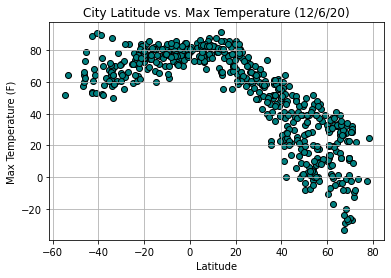

In [171]:
#We are using the city data to extract the values and do the conparison
x_values = city_df['Lat']
y_values = city_df['Max Temp(F)']
plt.scatter(x_values,y_values,facecolors="teal", edgecolors="black")
plt.title('City Latitude vs. Max Temperature (12/6/20)',fontsize = 12)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid()
plt.savefig("../output_data/figure_1.png")
plt.show()

*Analysis*
The code analyses the correlation between city latitude and maximum temperature.From the plot we can see that at higher temperatures, Latitudes tend to have negative values 
The plot has a curve showing how one temperature level is affected by latitude

## Latitude vs. Humidity Plot

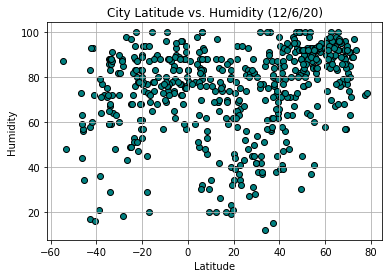

In [183]:
#We are using the city data to extract the values and do the conparison
x_values = city_df['Lat']
y_values = city_df['Humidity']
plt.scatter(x_values,y_values,facecolors="teal", edgecolors="black")
plt.title('City Latitude vs. Humidity (12/6/20)',fontsize = 12)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.grid()
plt.savefig("../output_data/figure_2.png")
plt.show()

*Analysis*
The plot above analyses the correlation between city latitude and humidity and we can see that, the points on the plot are spread with a considerable concentration at higher latitudes
Humidity level tends to be more higher at higher latitudes as we can see the cluster on the plot 

## Latitude vs. Cloudiness Plot

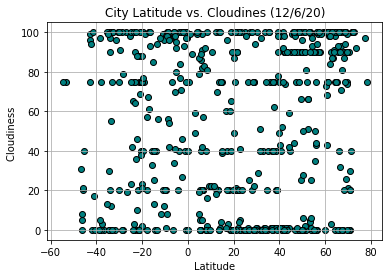

In [175]:
#We are using the city data to extract the values and do the conparison
x_values = city_df['Lat']
y_values = city_df['Cloudiness']
plt.scatter(x_values,y_values,facecolors="teal", edgecolors="black")
plt.title('City Latitude vs. Cloudines (12/6/20)',fontsize = 12)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness ')
plt.grid()
plt.savefig("../output_data/figure_3.png")
plt.show()

*Analysis*
The plot above shows how widely scattered the correlation is between city latitude and cloudiness from the data. There are mild concentrations at very high and very latitutudes and clouds 

## Latitude vs. Wind Speed Plot

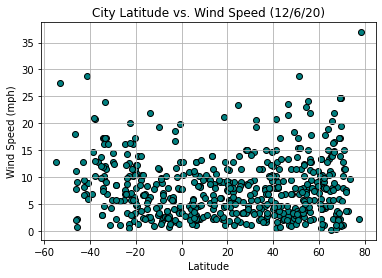

In [177]:
#We are using the city data to extract the values and do the conparison
x_values = city_df['Lat']
y_values = city_df['Wind Speed']
plt.scatter(x_values,y_values,facecolors="teal", edgecolors="black")
plt.title('City Latitude vs. Wind Speed (12/6/20)',fontsize = 12)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()
plt.savefig("../output_data/figure_4.png")
plt.show()

*Analysis*
The plot above shows how we have a higher concentration at the bottom of the plot, wind speed 

## Linear Regression

In [208]:
#Extacst latitude values from existing dataframe and save results as new dataframe to use for plotting

#Northern Latitude
north_lat = city_df.loc[city_df['Lat'] >=0]

north_df = pd.DataFrame(north_lat )
north_df.head()

,City,Lat,Lng,Max Temp(F),Humidity,Cloudiness,Wind Speed,Country,Date
2,Gaziantep,37.06,37.38,35.60,80,0,2.15,TR,1607289745
3,Ciudad Bolivar,8.12,-63.55,88.00,56,100,8.34,VE,1607289611
5,Batagay,67.63,134.63,-29.22,79,0,3.20,RU,1607289749
6,Saint Paul Harbor,57.79,-152.41,35.60,91,90,5.82,US,1607289750
9,Octeville,49.63,-1.64,45.00,30,66,4.00,FR,1607289755


In [210]:
#Extacst latitude values from existing dataframe and save results as new dataframe to use for plotting

#Southern Latitude
south_lat = city_df.loc[city_df['Lat'] < 0]

south_df = pd.DataFrame(south_lat)
south_df.head()

,City,Lat,Lng,Max Temp(F),Humidity,Cloudiness,Wind Speed,Country,Date
0,Maumere,-8.62,122.21,80.80,76,100,1.77,ID,1607289743
1,Tamandaré,-8.76,-35.10,77.65,74,56,8.90,BR,1607289744
4,Hermanus,-34.42,19.23,66.00,86,99,8.01,ZA,1607289748
7,Busselton,-33.65,115.33,50.00,86,0,11.99,AU,1607289752
8,Rikitea,-23.12,-134.97,76.69,76,0,12.68,PF,1607289753


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7466546198817844


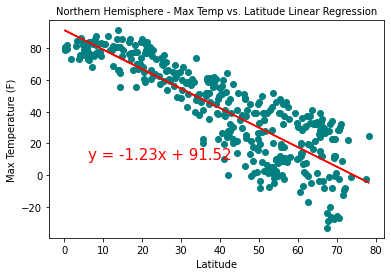

In [225]:
#Linear regression model
# Add the linear regression equation and line to plot
x_values = north_df['Lat']
y_values = north_df['Max Temp(F)']

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values,color="teal")

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")


# Label plot
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression',fontsize = 10)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

# Print r square value
print(f"The r-squared is: {rvalue**2}")
plt.savefig("../output_data/figure_5.png")

# Show plot
plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.3082614353593427


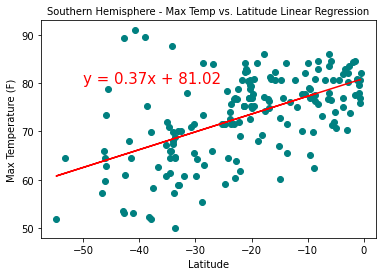

In [224]:
#Linear regression model
# Add the linear regression equation and line to plot
x_values = south_df['Lat']
y_values = south_df['Max Temp(F)']

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values,color="teal")

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,80),fontsize=15,color="red")


# Label plot
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression',fontsize = 10)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

# Print r square value
print(f"The r-squared is: {rvalue**2}")
plt.savefig("../output_data/figure_6.png")

# Show plot
plt.show()


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.1543575218932876


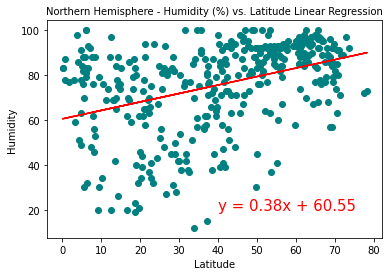

In [223]:
#Linear regression model
# Add the linear regression equation and line to plot
x_values = north_df['Lat']
y_values = north_df['Humidity']

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values,color="teal")

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,20),fontsize=15,color="red")


# Label plot
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression',fontsize = 10)
plt.xlabel('Latitude')
plt.ylabel('Humidity')

# Print r square value
print(f"The r-squared is: {rvalue**2}")
plt.savefig("../output_data/figure_7.png")

# Show plot
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.1088305586034265


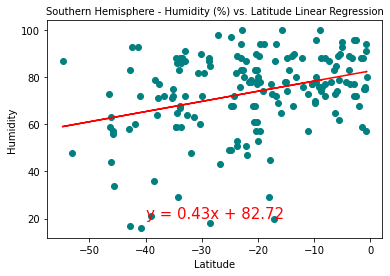

In [222]:
#Linear regression model
# Add the linear regression equation and line to plot
x_values = south_df['Lat']
y_values = south_df['Humidity']

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values,color="teal")

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,20),fontsize=15,color="red")


# Label plot
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression',fontsize = 10)
plt.xlabel('Latitude')
plt.ylabel('Humidity')

# Print r square value
print(f"The r-squared is: {rvalue**2}")
plt.savefig("../output_data/figure_8.png")

# Show plot
plt.show()


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.06392758510003585


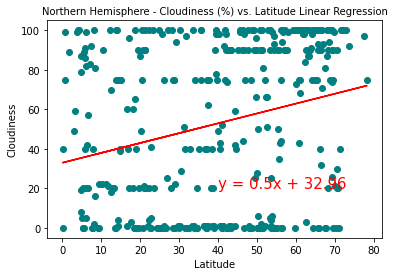

In [226]:
#Linear regression model
# Add the linear regression equation and line to plot
x_values = north_df['Lat']
y_values = north_df['Cloudiness']

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values,color="teal")

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,20),fontsize=15,color="red")


# Label plot
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression',fontsize = 10)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

# Print r square value
print(f"The r-squared is: {rvalue**2}")
plt.savefig("../output_data/figure_9.png")

# Show plot
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.04779347332117942


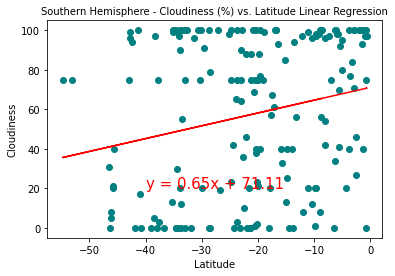

In [227]:
#Linear regression model
# Add the linear regression equation and line to plot
x_values = south_df['Lat']
y_values = south_df['Cloudiness']

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values,color="teal")

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,20),fontsize=15,color="red")


# Label plot
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression',fontsize = 10)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

# Print r square value
print(f"The r-squared is: {rvalue**2}")
plt.savefig("../output_data/figure_10.png")

# Show plot
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


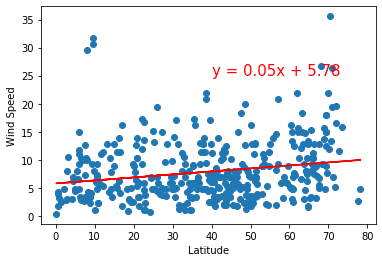

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


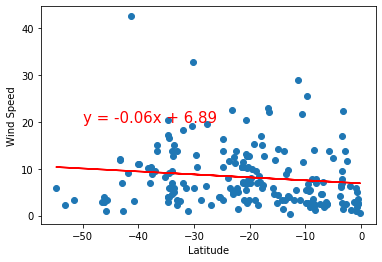